## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

#the seaborn set method is used to help with histogram formatting
sns.set()


`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#use the pandas read_csv method to import dataframe and view first five lines
df = pd.read_csv('ab_data.csv')
df.head()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
#view details about dataframe shape and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [4]:
#Count the number of unique user_id's in the dataframe
print('unique users:', df.user_id.nunique())


unique users: 290584


d. The proportion of users converted.

In [5]:
#finds the average of the 1 and 0 values in the converted collumn which is equivalent to a proportion of converted
print('proportion converted:', df.converted.mean())


proportion converted: 0.11965919355605512


e. The number of times the `new_page` and `treatment` don't match.

In [6]:
#filters rows where group is treatment and not new page into the variable nomatch1
nomatch1 = df.query("group == 'treatment' and landing_page != 'new_page'")

#fiters rows where the landing page is new_page and the group is not tratment into the variable nomatch2
nomatch2 = df.query("group != 'treatment' and landing_page == 'new_page'")

#the nomatch variable is the combination of the count of nomatch1 and nomatch2. nomatch.user_id is then displayed
#as a count of unmatched rows
nomatch = nomatch1.count() + nomatch2.count()
print('number of unmatched rows:', nomatch.user_id)


number of unmatched rows: 3893


f. Do any of the rows have missing values?

In [7]:
#displays null values in each dataframe collumn
df.isna().sum()


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#two querys are stored in two dataframes that contain rows where 'treatment' group matches 'new_page' and 'control' group
#matches 'old_page'.
match_new = df.query("group == 'treatment' and landing_page == 'new_page'")
match_old = df.query("group == 'control' and landing_page == 'old_page'")
#the frist dataframe is appended to the other and saved under the variable: 'df2'
df2 = match_new.append(match_old)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
#prints the number of unique iser_id's in df2
print('unique users:', df2.user_id.nunique())


unique users: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#counts user_id occurences in descending order
#the first user_id desplayed is the only repeat
df2.user_id.value_counts()


773192    2
630732    1
811737    1
797392    1
795345    1
801490    1
799443    1
787157    1
793302    1
817882    1
842446    1
815835    1
805596    1
803549    1
809694    1
807647    1
895712    1
840399    1
836301    1
899810    1
834242    1
936604    1
934557    1
940702    1
938655    1
830144    1
828097    1
832195    1
838348    1
821956    1
         ..
734668    1
736717    1
730574    1
775632    1
771538    1
642451    1
773587    1
783828    1
785877    1
779734    1
781783    1
759256    1
726472    1
748999    1
746950    1
753093    1
751044    1
740803    1
738754    1
744897    1
742848    1
634271    1
632222    1
636316    1
630169    1
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
#query to display the row information for the repeated user_id
df2.query("user_id == '773192'")


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
#drops one of the repeated user_id rows by index number
df2 = df2.drop(index=2893)


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
#finds the conversion rate of all data
print('conversion rate:', df2.converted.mean())


conversion rate: 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
#filters rows by 'control' group and finds the proportion of converted users.
control_rate = df2.query("group == 'control'")['converted'].mean()
print('control group conversion rate:', control_rate)


control group conversion rate: 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
#filters rows by 'treatment' group and finds proportion of converted users
treatment_rate = df2.query("group == 'treatment'")['converted'].mean()
print('treatment group conversion rate:', treatment_rate)


treatment group conversion rate: 0.11880806551510564


d. What is the probability that an individual received the new page?

In [17]:
#divides the count of user_id's that recieved the new page by the count of all user_id's to find probability of recieving 
#the new page
print('new page probability:', df2.query("landing_page == 'new_page'")['user_id'].count() / df2.user_id.count())


new page probability: 0.5000619442226688


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer:**

No, there needs to be logristic regression models or sample distributions along with p-values in order to determine confidence in AB testing.  This scientific approach is used in an attempt to prove the null hypothesis of no or negative effect from the new page on conversion rates.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer:**

$$H_0: P_{new} - p_{old} \le 0$$
$$H_1: p_{new} - p_{old} > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
#the conversion rateis assumed to be equal for both groups
null_rate = df2.converted.mean()
print('the null conversion rate is:', null_rate)


the null conversion rate is: 0.11959708724499628


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
#the null rate is displayed as the null conversion rate is the same for both groups
print('the null conversion rate is still:', null_rate)


the null conversion rate is still: 0.11959708724499628


c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
#df2 is filtered by the 'treatment' group and counted.  The result is assigned to the n_new variable
n_new = df2[df2['group'] == 'treatment']['user_id'].count()
print('number of individuals in treatment group:', n_new)


number of individuals in treatment group: 145310


d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
#df2 is filtered by the 'control' group and counted.  The result is assigned to the n_old variable
n_old = df2[df2['group'] == 'control']['user_id'].count()
print('number of individuals in control group:', n_old)


number of individuals in control group: 145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
#numpy.random.choice() is used to simulate conversions based on the number of individuals in the treatment group 
#and the null conversion rate.
new_page_converted = np.random.choice(2, size=n_new, p=[(1 - null_rate), null_rate])


f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
#numpy.random.choice() is used to simulate conversions based on the number of individuals in the control group 
#and the null conversion rate.
old_page_converted = np.random.choice(2, size=n_old, p=[(1 - null_rate), null_rate])


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
#the mean of 'old_page_converted' is subtracted from 'new_page_converted' in order to find any difference in simmulated
#conversion rates
print('simulated difference:', new_page_converted.mean() - old_page_converted.mean())


simulated difference: 0.002158795615655962


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [25]:
#this iterates the previous simulation steps: a-g 1000 times to find the differences in means under the null hypothesis.  
#each resulting difference is appended to a list assigned to the variable: p_diffs.
p_diffs = []
for i in range(1000):
    new_bootstrap = np.random.choice(2, size=n_new, p=[(1 - null_rate), null_rate]).mean()
    old_bootstrap = np.random.choice(2, size=n_old, p=[(1 - null_rate), null_rate]).mean()
    p_diffs.append(new_bootstrap - old_bootstrap)


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [26]:
#the list: p_diffs is converted to a numpy array for more efficient implementation of functions
p_diffs = np.array(p_diffs)


Text(0, 0.5, 'Count of simulations')

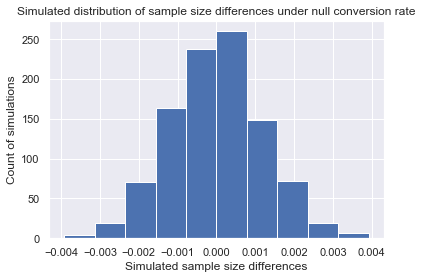

In [27]:
#the numpy array p_diffs normal distribution is then plotted with the matplotlib histogram function
plt.hist(p_diffs)
plt.title('Simulated distribution of sample size differences under null conversion rate')
plt.xlabel('Simulated sample size differences')
plt.ylabel('Count of simulations')


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
#the observed difference in 'control' and 'treatment' group conversions is assigned to the variable: obs_diff
obs_diff = treatment_rate - control_rate
obs_diff


-0.0015782389853555567

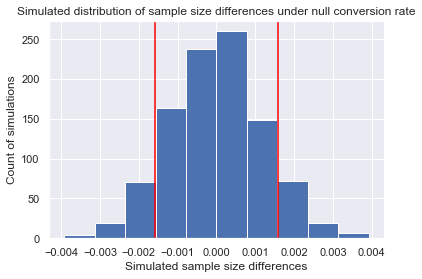

In [29]:
#for ease of visualization, the obseved difference is plotted as an x intercept red line over the previously calculated 
#normal distribution
plt.hist(p_diffs)
plt.title('Simulated distribution of sample size differences under null conversion rate')
plt.xlabel('Simulated sample size differences')
plt.ylabel('Count of simulations')
plt.axvline(x=obs_diff, color='red')
plt.axvline(x=-obs_diff, color='red')


In [30]:
#in order to find the p-value of the null hypothesis, the mean of the simulated differences that are less than the observed
#difference is calculated
print('the p-value of the null hypothesis is:', (p_diffs > obs_diff).mean())


the p-value of the null hypothesis is: 0.91


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:**
As directly observed in the data, the conversion rate was slightly greater for the control group than the treatment group.  This is illustrated by an observed difference of approximately -0.2% in the red line above.  In order to determine the probability of this outcome under the null hypothesis, assuming that conversion rates were equal for both groups, 10000 samples were simulated for each group's size under the null conversion rate.  The normal probability distribution of the differences in conversion rates are illustrated in the above histogram.  It turns out that the __p_value__ for the observed difference in this case is 0.89.  In other words, the probability of the null-hypothesis being true for the observed data is 89%.  This is significantly higher than the 5% type one error rate threshold. This aligns with the observed observation that the control group was converted at a slightly higher rate than the treatment group.

In this case, __the null hypothesis was not successfully disproven__.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
#statsmodels.api is imported to create logistic regressions and z-test
import statsmodels.api as sm

#the amount of converted for each group are assigned to variables
convert_old = df2.query("group == 'control'")['converted'].sum()
convert_new = df2.query("group == 'treatment'")['converted'].sum()

#the total individuals in each group are assigned to variables
n_old = df2[df2['landing_page'] == 'old_page']['user_id'].count()
n_new = df2[df2['landing_page'] == 'new_page']['user_id'].count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
#the variables for converted and totals are assigned to counts and nobs respectively
counts = np.array([convert_old, convert_new])
nobs = np.array([n_old, n_new])
#the z-test accepts the counts and nobs variables and calculates the p-value according to the null hypothesis, 
#which is specified by the alternative='smaller' argument
stat, pval = sm.stats.proportions_ztest(counts, nobs, alternative='smaller')
print('p-value:', pval, '\nz-score:', stat)


p-value: 0.9050583127590245 
z-score: 1.3109241984234394


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:**

The z-score and p-value calculated from stats.proportions_ztest match the results from the simulated distribution.  Additionally, the z-score of 1.31 does not contradict the normal distribution.  Both tests have about a 0.90 p-value indicating that the null hypothesis: $H_0: P_n - P_o \le 0$ cannot come even close to being disproven in this case.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:**
We should use a use a logistic regression since they are best for predicting one of two outcomes rather than a continuous series of quantitative outcomes. 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
#create an intercept collumn for regression calculations
df2['intercept'] = 1


In [34]:
#assign dummy collumns based on treatment and control groups
df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])


In [35]:
#drop control group so that only ab_group remains
df2 = df2.drop('control', axis=1)


In [36]:
#preview dataframe to confirm 'ab_page' collumn
df2.head()


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [37]:
#create logistic regression to determine probability of conversion based on treatment or control group
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

#fit model and summarize results
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 03 May 2019   Pseudo R-squ.:               8.077e-06
Time:                        16:29:04   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

According to the results of the above logistic regression, the p-value for conversions is 0.19 which indicates that it is not statistically significant.  Therefore, a multiplicative relationship between ab_page and the odd of conversion cannot be infered.  

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

**Answer:**
The p-value associated with the logistic regression model is 0.19 which is different from the calculated 0.9 p-value.  The original null hypothesis was that the control group had at least as many conversions as the treatment group.  The logistic regression model simply determines the probability that the conversions will be different from the mean.  If the p-value was based on the following hypothesis, then the results would match: $$H_O: p_n = p_o$$ $$H_1: p_n \ne p_o$$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**
In order to determine factors that influence conversion rates, many demographic factors may be of influence.  For example, the age, country of origin or gender of the individual.  Perhaps income is an influence as well.  

Although it would be useful to test all of these factors in tandem, they may be misleading.  This is due to the increased likelyhood that the variables being tested have a lurking multicollinear relationship with eachother.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns -  Provide the statistical output as well as a written response to answer this question.

In [38]:
#load 'countries.csv' into the pandas dataframe: df_c and preview the first five lines
df_c = pd.read_csv('countries.csv')
df_c.head()


,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [39]:
#set df_c index as 'user_id' in order to join the country collumn inplace to df2
df2 = df2.join(df_c.set_index('user_id'), on='user_id')

#preview five lines to ensure successful join
df2.head()


,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA


In [40]:
#retrieve dummy variables for each country and join them to df2 inplace
df2 = df2.join(pd.get_dummies(df2['country']))

#preview five lines to ensure success
df2.head()


,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0


In [41]:
#create logistic regression to compare probability of conversion rates for US and UK as compared to CA
logit_mod2 = sm.Logit(df2['converted'], df2[['intercept', 'US', 'UK']])

#fit the regression and summarize results
results2 = logit_mod2.fit()
results2.summary()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 03 May 2019   Pseudo R-squ.:               1.521e-05
Time:                        16:29:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

**Explanation of output:**

As seen by the p-values of 'US' and 'UK' in comparision to 'CA', no statistical significance disproving the null can be inferred from the logistic model.  Therefore, no multiplicitive change in the odds of conversion based on country can be determined by the coefficients. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [42]:
#create three new collumns that are the interactions of country and ab_page inplace in df2
df2['CA_ab'] = df2['CA'] * df2['ab_page']
df2['UK_ab'] = df2['UK'] * df2['ab_page']
df2['US_ab'] = df2['US'] * df2['ab_page']

#confirm the addition of the new collumns
df2.head()


,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,CA_ab,UK_ab,US_ab
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0,1,0,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0,1,0,0


In [43]:
#create logistic regression comparing probability of conversion based on interactions of ab_page and country collumns
logit_mod3 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'UK', 'US', 'UK_ab', 'US_ab']])

#fit the regression and summarize results
results3 = logit_mod3.fit()
results3.summary()


Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 03 May 2019   Pseudo R-squ.:               3.482e-05
Time:                        16:29:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK_ab          0.0783      0.057      1.378      0.168      -0.033       0.190
US_ab          0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

__Explanation of output:__

With the inclusion of treatment page and country in the same logistic model, there appears to be no significant interaction between the variables and their effect on conversion.  The p-values of 'UK_ab' and 'US_ab' are extremely high as are their isolated regression model p-values. This suggests that there no statistically significant effect on country and ab_page combined conversion rates when compared to eachother.  This therefore fails to disprove the null hypothesis. 

__Conclusion of results:__

From the above logistic regressions, there is no evidence to suggest that conversion rates differ based on country of origin, treatment group, or a combination of the two variables with a type one error threshold of 5%.  Additionally, there is a large enough sample size to be confident in a failure to disprove the null hypothesis.  Perhaps there are other unconsidered lurking variables, but the ones under consideration do not appear to have statistical significance.  

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0